任务4：记录5个模型（逻辑回归、SVM、决策树、随机森林、XGBoost）关于accuracy、precision，recall和F1-score、auc值的评分表格，并画出ROC曲线。

参考 

<a  href="https://daniel18qzx.github.io/%E4%BA%BA%E5%B7%A5%E6%99%BA%E8%83%BD/%E7%9B%91%E7%9D%A3%E5%AD%A6%E4%B9%A0/32512/#more">daniel_的回答 </a> 

<a  href="https://www.cnblogs.com/dlml/p/4403482.html">机器学习之分类器性能指标之ROC曲线、AUC值</a> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train=pd.read_csv('train1.csv',encoding='gbk')
test=pd.read_csv('test1.csv',encoding='gbk')

In [2]:
X_train=train.drop('status',axis=1)
X_test=test.drop('status',axis=1)
y_train=train['status']
y_test=test['status']

In [3]:
from sklearn.preprocessing import minmax_scale
X_train = minmax_scale(X_train)
X_test =  minmax_scale(X_test)

In [4]:
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

LR = LogisticRegression(random_state=2018,tol=1e-6)
LR = LR.fit(X_train, y_train)

svc = SVC(kernel='sigmoid',probability=True,random_state=2018,tol=1e-6)
svc = svc.fit(X_train, y_train)

DT = DecisionTreeClassifier(max_depth = 6,random_state=2018)
DT = DT.fit(X_train, y_train)

RF = RandomForestClassifier(n_estimators=100,random_state=2018)
RF = RF.fit(X_train, y_train)

names = ["LR", "SVC", 'DT', "RF"]
models = [LR, svc, DT, RF]
evaluates = ['accuracy', 'precision', 'recall', 'f1', 'auc']

In [5]:
df_list = []
for name,model in zip(names,models):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #accuracy
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
    
    #precision   
    train_precision = precision_score(y_train,y_train_pred)
    test_precision = precision_score(y_test,y_test_pred)   
    
    #recall
    train_recall = recall_score(y_train,y_train_pred)
    test_recall = recall_score(y_test,y_test_pred)   
    
    #f1
    train_f1 = f1_score(y_train,y_train_pred)
    test_f1 = f1_score(y_test,y_test_pred)   
    
    #auc
    y_train_pred = model.predict_proba(X_train)[:,1]#预测y=1的概率
    y_test_pred = model.predict_proba(X_test)[:,1]
    #predict_proba返回的是一个 n 行 k 列的数组， 第 i 行 第 j 列上的数值是模型预测 第 i 个预测样本为某个标签的概率，并且每一行的概率和为1。
   
    train_auc = roc_auc_score(y_train,y_train_pred)
    test_auc = roc_auc_score(y_test,y_test_pred)
#     print('{} 训练集： accuracy:{:.3},precision:{:.3}, recall:{:.3}, f1:{:.3}, auc:{:.3}'.format(name,train_accuracy,train_precision,train_recall,train_f1,train_auc))
#     print('{} 测试集： accuracy:{:.3},precision:{:.3}, recall:{:.3}, f1:{:.3}, auc:{:.3}'.format(name,test_accuracy,test_precision,test_recall,test_f1,test_auc))
#     print('\n')
    df = pd.DataFrame(np.array([train_accuracy,train_precision,train_recall,train_f1,train_auc,test_accuracy,test_precision,test_recall,test_f1,test_auc]).reshape(2,-1),
                  index = ['train','test'],
                  columns = ['Accuracy','Precision','Recall','F1-Score','AUC-Score'])
    df_list.append(df)

pd.concat(df_list,axis=0,keys=names)

Accuracy  Precision    Recall  F1-Score  AUC-Score
LR  train  0.799742   0.751748  0.281414  0.409524   0.788464
    test   0.783723   0.672222  0.346705  0.457467   0.770279
SVC train  0.753553   1.000000  0.001309  0.002614   0.787912
    test   0.739261   1.000000  0.008596  0.017045   0.774459
DT  train  0.838178   0.768916  0.492147  0.600160   0.837971
    test   0.748304   0.543860  0.266476  0.357692   0.655737
RF  train  1.000000   1.000000  1.000000  1.000000   1.000000
    test   0.779955   0.674847  0.315186  0.429688   0.756123

In [6]:
def draw_roc_curve(train_pre_proba,test_pre_proba,train_auc,test_auc,model_name,num):
    fpr,tpr,roc_auc = train_pre_proba
    test_fpr,test_tpr,test_roc_auc = test_pre_proba
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='train ROC curve (area = %0.2f)' % train_auc)
    plt.plot(test_fpr, test_tpr, color='red',lw=lw, label='test ROC curve (area = %0.2f)' %test_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title( model_name)
    plt.legend(loc="lower right")

    


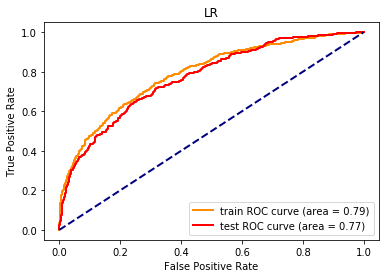

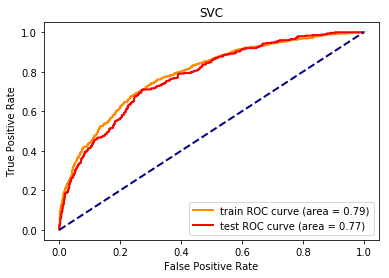

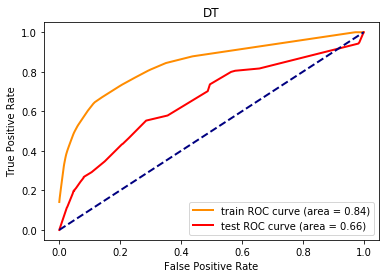

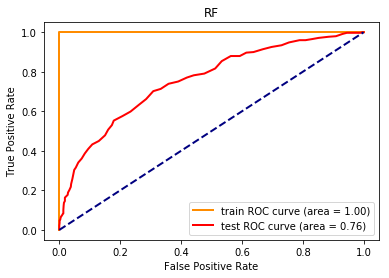

In [7]:
for num,name,model in zip(range(1,7),names,models):
    
    y_train_pred = model.predict_proba(X_train)[:,1]
    y_test_pred = model.predict_proba(X_test)[:,1]


    train_roc = roc_curve(y_train,y_train_pred)
    test_roc = roc_curve(y_test,y_test_pred)

    train_auc = roc_auc_score(y_train,y_train_pred)
    test_auc = roc_auc_score(y_test,y_test_pred)

    draw_roc_curve(train_roc,test_roc,train_auc,test_auc,name,num)